In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib as mpl
import os
from matplotlib.lines import Line2D
from collections import Counter
import math
from sklearn.decomposition import PCA
from aging.behavior.syllables import relabel_by_usage
from tqdm import tqdm
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import random
import scipy

In [2]:
# plot/colors definitions
cpath = '/n/groups/datta/win/longtogeny/code/notebooks/exploration/Dana'
data_loc=cpath+'/figs/'
try:
    os.mkdir(data_loc)
except FileExistsError:
    # directory already exists
    pass

sns.set_style('white')

In [3]:
## upload data frame females
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_02/longtogeny_musages_mtx_all.parquet')
mdf_all = pd.read_parquet(path)
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_02/longtogeny_musages_mtx_most_used.parquet')
mdf = pd.read_parquet(path)

In [4]:
## filter out bad days - 
bad_session=[221, 228]
#bad_syllable=[44,89]
bad_syllable=[44]
bad_mouse='04_01'
new_df=mdf.copy()
new_df.drop(bad_session, level=0, axis=0, inplace=True)
new_df.drop(bad_mouse, level=1, axis=0, inplace=True)
new_df.drop(bad_syllable, axis=1, inplace=True)

In [5]:
mdf

syllables                                                                   0   \
age mouse cage experiment       uuid                                             
21  01_01 01   longtogeny_males 2c031642-6e7a-4b1a-8b0c-eaa2f28ef089  0.048960   
    01_02 01   longtogeny_males 181340b6-6c1d-4528-8920-2102d75d5711  0.038551   
    01_03 01   longtogeny_males b29c4d14-3e47-4ab9-8744-fb45862cc03c  0.036003   
    01_04 01   longtogeny_males b9459d2b-2357-427a-ad23-1b447a7621ea  0.039577   
    02_01 02   longtogeny_males b1884a07-9d38-44e7-916b-b2d6b4e0b985  0.037646   
...                                                                        ...   
492 03_04 03   longtogeny_males dc4e663e-9e0f-4ba7-85cf-c2ce2eb7f078  0.026581   
    04_01 04   longtogeny_males d4331f3b-63de-4a14-a23f-201999bf63f7  0.027868   
    04_02 04   longtogeny_males e99e96ac-07f4-406f-acbb-a1f5a5a97411  0.019759   
    04_03 04   longtogeny_males a2109f2e-a61d-41e6-9dea-6a2ab5a8be28  0.028600   
    04_04 04   longtogeny_males c7b28112-e3d8-4bcf-9c56-da37103bcb9c  0.029844   

syllables                                                                   3   \
age mouse cage experiment       uuid                                             
21  01_01 01   longtogeny_males 2c031642-6e7a-4b1a-8b0c-eaa2f28ef089  0.020797   
    01_02 01   longtogeny_males 181340b6-6c1d-4528-8920-2102d75d5711  0.017650   
    01_03 01   longtogeny_males b29c4d14-3e47-4ab9-8744-fb45862cc03c  0.013593   
    01_04 01   longtogeny_males b9459d2b-2357-427a-ad23-1b447a7621ea  0.018408   
    02_01 02   longtogeny_males b1884a07-9d38-44e7-916b-b2d6b4e0b985  0.004772   
...                                                                        ...   
492 03_04 03   longtogeny_males dc4e663e-9e0f-4ba7-85cf-c2ce2eb7f078  0.034372   
    04_01 04   longtogeny_males d4331f3b-63de-4a14-a23f-201999bf63f7  0.008885   
    04_02 04   longtogeny_males e99e96ac-07f4-406f-acbb-a1f5a5a97411  0.030735   
    04_03 04   longtogeny_males a2109f2e-a61d-41e6-9dea-6a2ab5a8be28  0.026134   
    04_04 04   longtogeny_males c7b28112-e3d8-4bcf-9c56-da37103bcb9c  0.028926   

syllables                                                                   6   \
age mouse cage experiment       uuid                                             
21  01_01 01   longtogeny_males 2c031642-6e7a-4b1a-8b0c-eaa2f28ef089  0.000867   
    01_02 01   longtogeny_males 181340b6-6c1d-4528-8920-2102d75d5711  0.004180   
    01_03 01   longtogeny_males b29c4d14-3e47-4ab9-8744-fb45862cc03c  0.000735   
    01_04 01   longtogeny_males b9459d2b-2357-427a-ad23-1b447a7621ea  0.000460   
    02_01 02   longtogeny_males b1884a07-9d38-44e7-916b-b2d6b4e0b985  0.002651   
...                                                                        ...   
492 03_04 03   longtogeny_males dc4e663e-9e0f-4ba7-85cf-c2ce2eb7f078  0.037122   
    04_01 04   longtogeny_males d4331f3b-63de-4a14-a23f-201999bf63f7  0.023425   
    04_02 04   longtogeny_males e99e96ac-07f4-406f-acbb-a1f5a5a97411  0.048299   
    04_03 04   longtogeny_males a2109f2e-a61d-41e6-9dea-6a2ab5a8be28  0.032051   
    04_04 04   longtogeny_males c7b28112-e3d8-4bcf-9c56-da37103bcb9c  0.022957   

syllables                                                                   7   \
age mouse cage experiment       uuid                                             
21  01_01 01   longtogeny_males 2c031642-6e7a-4b1a-8b0c-eaa2f28ef089  0.050260   
    01_02 01   longtogeny_males 181340b6-6c1d-4528-8920-2102d75d5711  0.040409   
    01_03 01   longtogeny_males b29c4d14-3e47-4ab9-8744-fb45862cc03c  0.037472   
    01_04 01   longtogeny_males b9459d2b-2357-427a-ad23-1b447a7621ea  0.068569   
    02_01 02   longtogeny_males b1884a07-9d38-44e7-916b-b2d6b4e0b985  0.050901   
...                                                                        ...   
492 03_04 03   longtogeny_males dc4e663e-9e0f-4ba7-85cf-c2ce2eb7f078  0.015582   
    04_01 04   longtogeny_males d4331f3b-63de-4a14-a23f-20199

In [59]:
# prepare data
data=mdf.copy().reset_index()
ind = data['age'].unique()
concat = {}
for m, _df in data.groupby('mouse'):
    _df=_df.drop_duplicates(subset=['age'])
    arr = _df.drop(columns=['mouse','cage','experiment','uuid']).set_index('age').reindex(ind).to_numpy().flatten()
    concat[m] = arr
concat = pd.DataFrame(concat).T.fillna(0)
data_pca = concat.to_numpy()

In [60]:
## apply pca
pca = PCA(n_components=3)
pca_result = pca.fit_transform(np.log(data_pca + 1e-6))
df_subset = pd.DataFrame()
df_subset['PC1'] = pca_result[:,0]
df_subset['PC2'] = pca_result[:,1] 
df_subset['PC3'] = pca_result[:,2]
df_subset['labels'] = list(concat.index.get_level_values(0))
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.39350433 0.17320385 0.13410138]


Text(0.5, 1.0, 'PCA for each individual across the trajectory - as in bee paper')

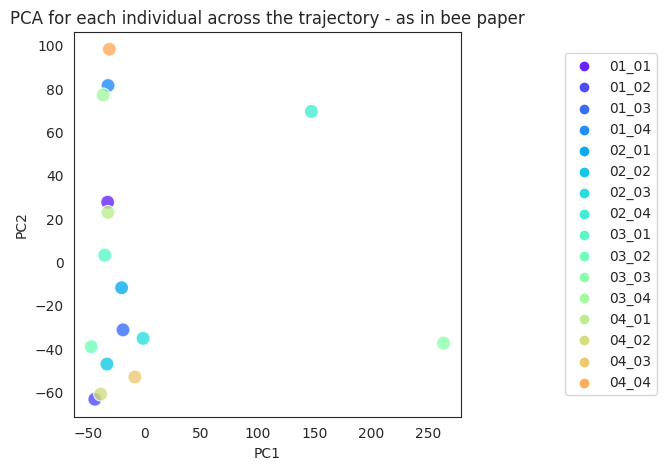

In [61]:
plt.figure(figsize=(5,5))
g=sns.scatterplot(
    x="PC1", y="PC2",
    palette=sns.color_palette('rainbow',20),
    data=df_subset,
    s=100,
    legend="full",
    hue = 'labels',
    alpha=0.8)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('PCA for each individual across the trajectory - as in bee paper')

In [62]:
## look at syllable loadings for age

In [63]:
# prepare data
# apply PCA
syll = list(mdf.columns)
pca = PCA(n_components=2)
pca.fit_transform(np.log(data_pca + 1e-6))

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'])
loadings['syll'] = syll * len(ind)
loadings['time'] = list(np.repeat(ind, len(syll)))

In [64]:
syll = list(mdf.columns)

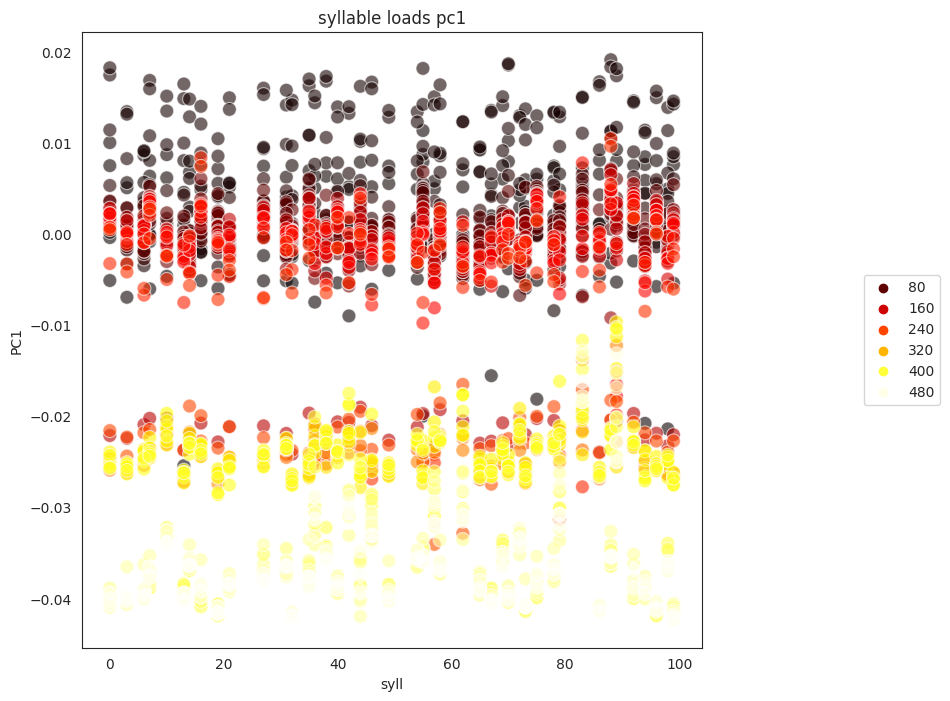

In [65]:
nsyll=10
to_plot = loadings
plt.figure(figsize=(8,8))
g=sns.scatterplot(data=to_plot, y='PC1', x='syll', hue='time', palette="hot", s=100, alpha=0.60)
plt.title('syllable loads pc1')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


Text(0.5, 1.0, 'syllable loads pc2')

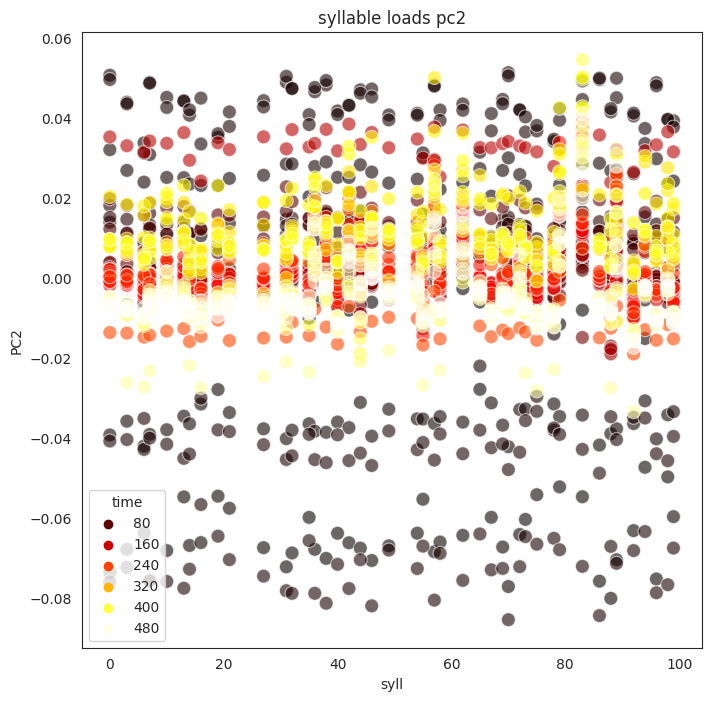

In [66]:
to_plot = loadings
plt.figure(figsize=(8,8))
sns.scatterplot(data=to_plot, y='PC2', x='syll', hue='time', palette="hot", s=100, alpha=0.60)
plt.title('syllable loads pc2')

Text(0.5, 1.0, 'syllable loadings on PC1')

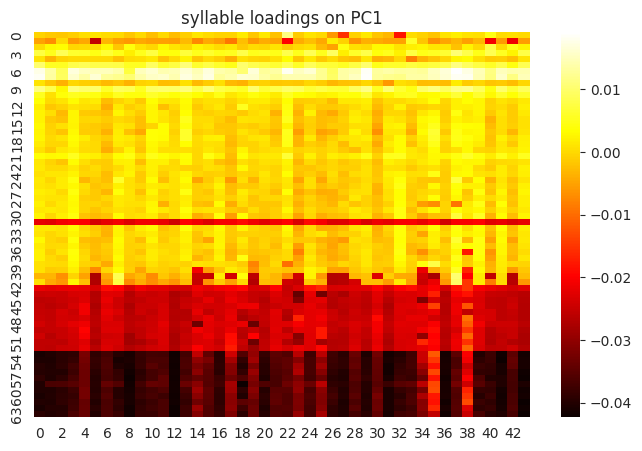

In [67]:
plt.figure(figsize=(8,5))
pc1= loadings.PC1.to_numpy().reshape(-1,len(syll))
ax=sns.heatmap(pc1, cmap="hot")
plt.title ('syllable loadings on PC1')

Text(0.5, 1.0, 'syllable loadings on PC2')

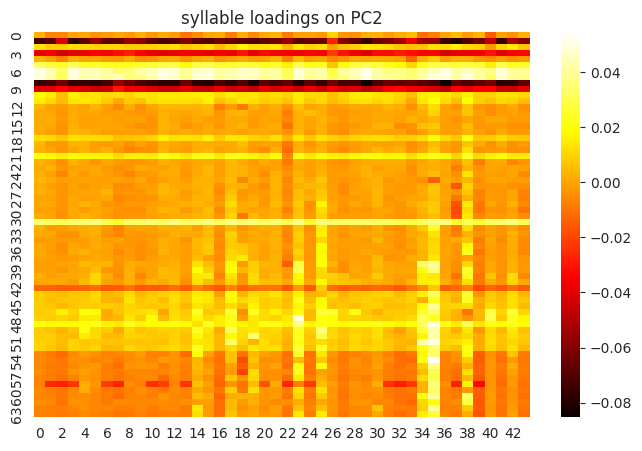

In [68]:
plt.figure(figsize=(8,5))
pc1= loadings.PC2.to_numpy().reshape(-1,len(syll))
ax=sns.heatmap(pc1, cmap="hot")
plt.title ('syllable loadings on PC2')